In [1]:
import pandas as pd
import numpy as np
import numpy_financial as npf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from numpy import *

from ggplot import *
from scipy.stats import logistic
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import *
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
import graphviz
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC, SVR
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


from linearmodels.iv import IV2SLS
from scipy import stats
from scipy.stats import trim_mean #trimmed mean
from scipy.stats import * #chi2_contingency로 카이제곱통계량계산
from scipy.stats import norm

import keyword
import random

#open api 불러올 때 필요한 것
from urllib.request import urlopen #request package 설치
from bs4 import BeautifulSoup #bs4 package 설치

# 그래프에서 한글 깨지지 않기 위헤 사용함
from matplotlib import rcParams
from matplotlib import font_manager,rc

rcParams['axes.unicode_minus']=False
plt.rcParams['font.family']='Malgun Gothic'
font_name=font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family=font_name)

import FinanceDataReader as fdr
import plotly.graph_objects as go
import plotly.subplots as ms
import math



In [2]:
df=pd.read_csv('c:/temp/household_2020a.csv')
df.head()

,year,metro,id,sex,age,number,education,marriage,asset,debt,income,income_d,industry,job,house
0,2020,G1,10000112,1,34,3,6,2,112000,54500,6593,4599,F,3,2
1,2020,G1,10000132,2,45,2,8,2,42500,17500,17720,15257,J,2,3
2,2020,G1,10000162,2,73,1,2,3,5712,0,908,725,T,4,2
3,2020,G1,10000182,1,58,2,4,2,14870,0,2748,2431,C,5,2
4,2020,G1,10000192,2,27,1,4,1,814,0,1015,893,R,2,3


In [4]:
income=df['income'].dropna()
len(income)

18064

In [5]:
df.tail()

,year,metro,id,sex,age,number,education,marriage,asset,debt,income,income_d,industry,job,house
18059,2020,G2,993800291,1,42,3,6,2,6705,2200,179,-390,NaN,NaN,3
18060,2020,G2,994800251,1,49,5,6,2,130180,22000,15454,11784,O,3,1
18061,2020,G2,994800261,1,57,5,6,2,265226,29000,15098,11560,NaN,NaN,1
18062,2020,G2,994800291,2,53,2,7,4,109695,25000,9114,7074,O,2,2
18063,2020,G2,995800261,1,44,5,6,2,71223,13000,7857,5404,C,3,1


In [6]:
income.describe()

count     18064.000000
mean       5494.711138
std        5563.512946
min           0.000000
25%        2026.000000
50%        4183.500000
75%        7331.750000
max      225116.000000
Name: income, dtype: float64

In [7]:
# 평균 5494만원, 최대값 22억5116만원

In [9]:
# 소수점 둘째자리까지 반올림 해라 = 셋째자리에서 반올림해라
np.round(5563.512946,2)

5563.51

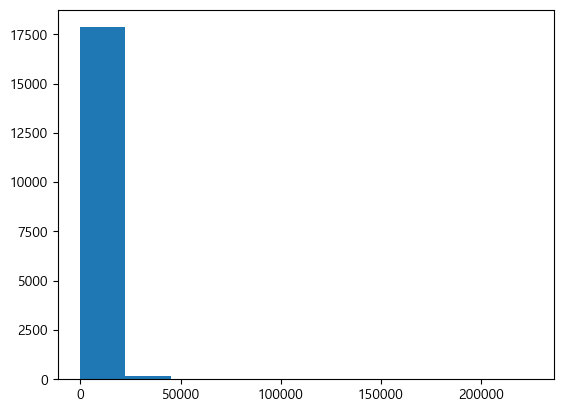

In [11]:
# 경상소득분포 히스토그램 그리기
plt.hist(income)
plt.grid
plt.show()

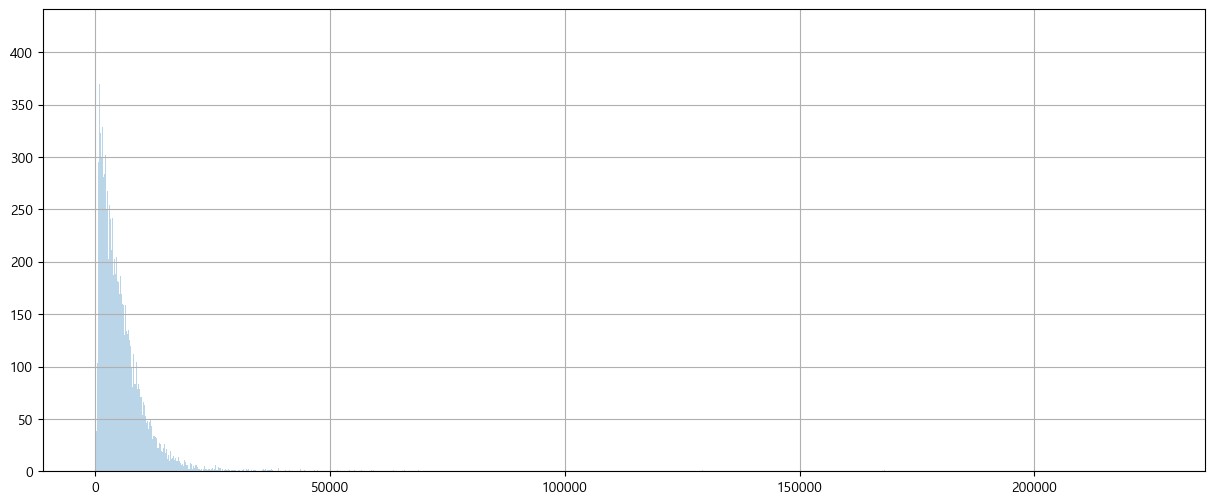

In [12]:
# 경상소득 히소토그램 이쁘게 그리기 1
fig, ax= plt.subplots(figsize=(15,6))
ax.hist(income, alpha=0.3, bins=2000)
ax.grid()
plt.show()

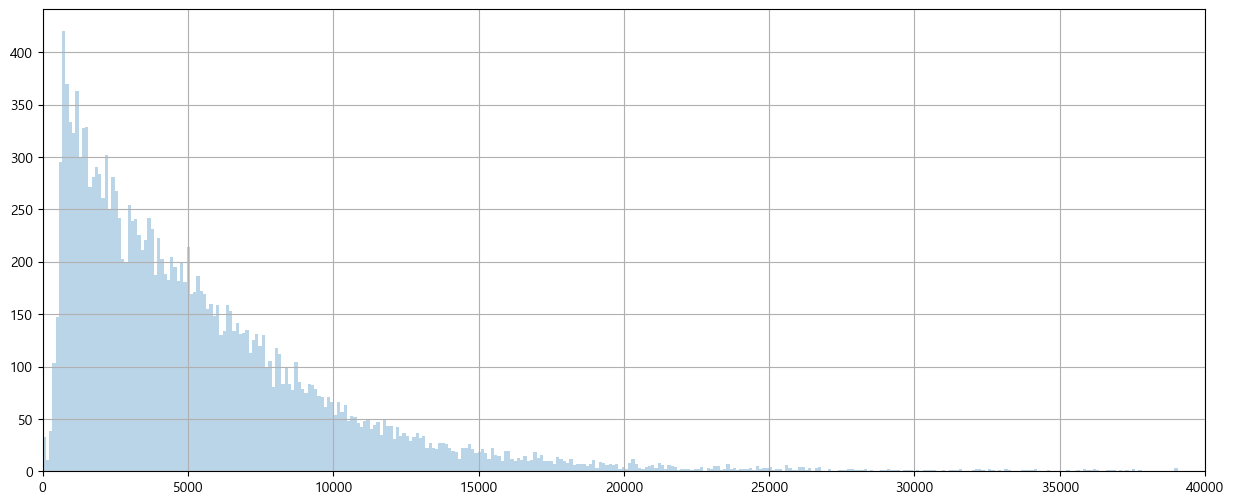

In [14]:
# 경상소득 히소토그램 이쁘게 그리기 2 : x 축 limit 정하기
fig, ax= plt.subplots(figsize=(15,6))
ax.hist(income, alpha=0.3, bins=2000)
ax.grid()
ax.set_xlim(0,40000) # 최대 값이 22억 이어씅니까, 오른쪽 ㄱ고리가 너무 길게 나옴. limit을 4억으로 두자
plt.show()

In [15]:
# 평균소득의 분포는 정규분포를 따를 것이다.
# 500개 추출해서 평균소득 구하고, 그걸 만 번 반복해서 평균소득의 histogram 그려보자

n=10000
mn=[]

for i in range(n):
    sample=np.random.choice(income, size=500, replace=True) # 무작위 복원 추출, 500개 뽑음, 이걸 10000번 반복함
    mean=np.mean(sample)
    mn.append(mean)
print(mn)

[5691.372, 5281.552, 5675.846, 5446.63, 5305.786, 5811.662, 5538.504, 5280.688, 5338.686, 5452.028, 5228.324, 5221.398, 5467.852, 5741.074, 5365.338, 5398.704, 5783.132, 5654.842, 5200.54, 5437.166, 5429.8, 5186.238, 5507.13, 5231.722, 5556.386, 5615.926, 5524.046, 5507.902, 5706.742, 5436.834, 5171.532, 5341.266, 5384.34, 5101.468, 5171.142, 5405.874, 5420.31, 5552.32, 5574.398, 5257.684, 5049.616, 5125.35, 5152.838, 5199.396, 5358.214, 5515.792, 5596.034, 5202.01, 5244.84, 5219.642, 5445.782, 5584.088, 5298.516, 5416.462, 5823.418, 5465.482, 5577.448, 5726.36, 5416.118, 5338.93, 5490.096, 5609.162, 5600.436, 5805.09, 5372.562, 5919.19, 5227.948, 5229.596, 5189.204, 5323.744, 5404.29, 5384.954, 5334.71, 5190.136, 5341.87, 5259.136, 5585.106, 5180.006, 5837.52, 5108.946, 5329.732, 5306.918, 5167.488, 5431.01, 5236.972, 5852.408, 5360.084, 5667.058, 5129.312, 5512.282, 5579.994, 5409.32, 5536.21, 5839.512, 5394.736, 5375.042, 5433.322, 5759.396, 5339.966, 5182.974, 5618.752, 5145.15, 55

In [16]:
# 나온게 전체 소득 중에 500개 뽑아서 평균소득 만들고, 그걸 10000번 해서, 값 10000개 나온것
len(mn)

10000

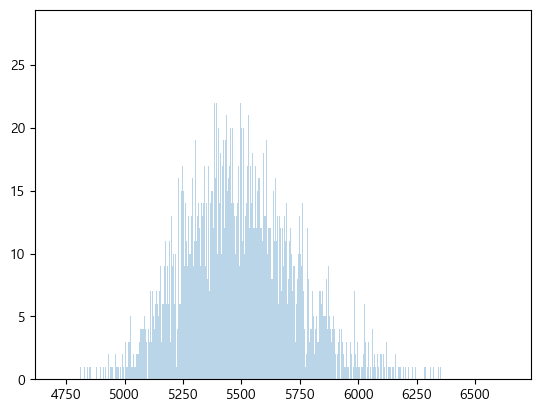

In [17]:
# 10000개 표본평균 히스토그램 그려보자. 
# by CLT, 표본평균은 정규분포를 따를 것으로 예상한다
plt.hist(mn,alpha=0.3,bins=2000)
plt.show()

In [18]:
# cLT 모징 central limit theorem
# 여튼
# 5500 중심으로, 정규분포
# 전체소득분포는 오른쪽으로 꼬리가 긴 분포
# 약 18000개 에서 뽑은 표본 500개 로 뽑은 표본평균의 히스토그램은 정규분포에 가깝다. 

In [19]:
# 동일 집단간 차이 검정
# 귀무가설 기각= p-value가 0.05 보다 작다 = 귀무가설과 실제값 차이가 없고, 차이가 있다면 우연이다
# 통계학에선 '두 현상에서는 차이가 없다'라는 것을 귀무가설로 설정한다.

# q4 뭐지
z=(167-0)/(2606/np.sqrt(13000)) # 머더랏
print(z)

7.306573138586187


In [20]:
z=7.3
p_value=1-norm.cdf(z)
print(p_value)

1.438849039914203e-13


In [26]:
# 동일집단간 차이검정 진짜 해보자

In [21]:
# 2019, 2020년 데이터 불러오자
df10=pd.read_csv('c:/temp/household_2019a.csv')
df20=pd.read_csv('c:/temp/household_2020a.csv')

In [22]:
df10.head()

,year,metro,id,sex,age,number,education,marriage,asset,debt,income,income_d,industry,job,house
0,2019,G1,10500141,1,56,6,6,2,44460,18840,3360,2470,C,3,2
1,2019,G1,10500151,2,64,2,3,3,86485,7000,4090,3855,NaN,NaN,2
2,2019,G1,10500161,1,84,2,6,2,20350,0,774,730,NaN,NaN,1
3,2019,G1,10500171,1,57,4,4,2,46498,10300,7411,6215,C,5,1
4,2019,G1,10500181,1,56,5,5,2,158174,23900,9972,7574,P,1,1


In [23]:
df20.head()

,year,metro,id,sex,age,number,education,marriage,asset,debt,income,income_d,industry,job,house
0,2020,G1,10000112,1,34,3,6,2,112000,54500,6593,4599,F,3,2
1,2020,G1,10000132,2,45,2,8,2,42500,17500,17720,15257,J,2,3
2,2020,G1,10000162,2,73,1,2,3,5712,0,908,725,T,4,2
3,2020,G1,10000182,1,58,2,4,2,14870,0,2748,2431,C,5,2
4,2020,G1,10000192,2,27,1,4,1,814,0,1015,893,R,2,3


In [24]:
df11=df10[['year','id','income']]
df21=df20[['year','id','income']]

In [25]:
df21.head()

,year,id,income
0,2020,10000112,6593
1,2020,10000132,17720
2,2020,10000162,908
3,2020,10000182,2748
4,2020,10000192,1015


In [28]:
# id 같은 애들끼리 찾아서, 2019 소득, 2020 소득 보고 두개 빼자
df=pd.merge(df11,df21,on='id',how='inner')
# how='inner' : 2년간 둘 다 조사된 id만 남긴다
df.head()

,year_x,id,income_x,year_y,income_y
0,2019,10600141,5385,2020,2695
1,2019,10600211,2772,2020,1563
2,2019,10600221,1140,2020,6014
3,2019,10600241,803,2020,851
4,2019,10600271,8021,2020,7264


In [30]:
# index column을 id로 바꾸자
df1=df.set_index('id')
df1.head()

,year_x,income_x,year_y,income_y
id,,,,
10600141,2019,5385,2020,2695
10600211,2019,2772,2020,1563
10600221,2019,1140,2020,6014
10600241,2019,803,2020,851
10600271,2019,8021,2020,7264


In [31]:
df2=df1[['income_x','income_y']]
df2.head()

,income_x,income_y
id,,
10600141,5385,2695
10600211,2772,1563
10600221,1140,6014
10600241,803,851
10600271,8021,7264


In [36]:
df2['diff']=df2['income_y']-df2['income_x']
df2.head()

,income_x,income_y,diff
id,,,
10600141,5385,2695,-2690
10600211,2772,1563,-1209
10600221,1140,6014,4874
10600241,803,851,48
10600271,8021,7264,-757


In [37]:
df2['diff'].describe()

count     13910.000000
mean        211.838030
std        2935.260708
min      -88470.000000
25%        -371.000000
50%         155.000000
75%         840.000000
max      137662.000000
Name: diff, dtype: float64

In [38]:
# 동일집단간 2019,2020년 소득 차이
# 평균소득 211만원, 표본크기 13910개

In [39]:
# 검정통계량 z, p-value 구하기
z=(211-0)/(2935/np.sqrt(13910))
print(z)

8.478868791464198


In [40]:
p_value=1-norm.cdf(z)
print(p_value)

0.0


In [41]:
# p-value가 0에 가까운 값 = 0.05가 훨씬 작은 값 -> 귀무가설 기각
# p-value란: 검정통계량 값에 대한 오른쪽 꼬리 확률
# 결론: 2019년에 비해 2020년에 소득이 실질적으로 증가한다

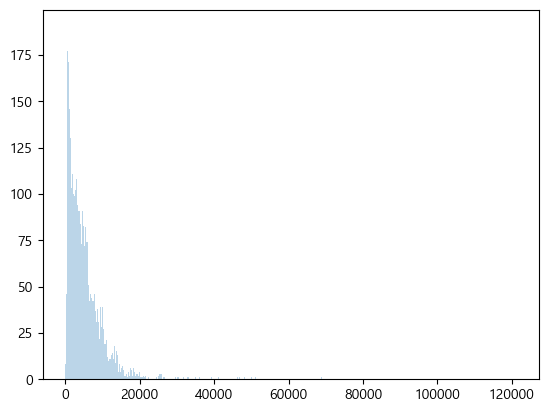

In [42]:
# 2019년과 2020년의 소득분포 히스토그램 그려보기
plt.hist(df2['income_x'],alpha=0.3,bins=2000)
plt.show()

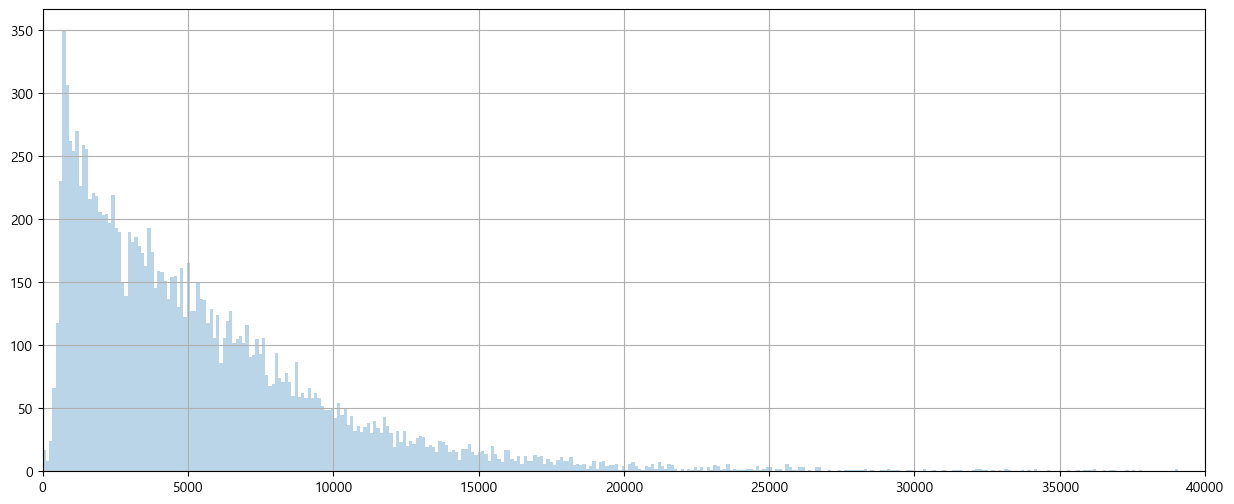

In [43]:
fig, ax=plt.subplots(figsize=(15,6))
ax.hist(df2['income_y'], alpha=0.3, bins=2000)
ax.grid()
ax.set_xlim(0,40000) # 최대 값이 20억이라서 위에가 길게 나와서, limit을 한 4억까지 그리도록 함
plt.show()

In [44]:
# inner join 말고도 있음